# DT2470 Lab 01: Teh Signal Processings

by Bob L. T. Sturm

In this first lab you will practice some fundamental concepts of signal processing. You will analyse a chosen sampled sound in the time-, frequency-, and time-frequency domains. You will write something intelligent about your analysis, observing things like periodicity, frequency content, harmonicity, etc. You will also learn to extract low-level features from audio and music signals. In the next lab, you will use these features for some machine learning madness.

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python. Here's some helpful links as well:

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.

# Part 1: Basics

1. Choose an audio file to work with from http://bbcsfx.acropolis.org.uk. Download it, load it using pydub (see [pydub.AudioSegment](https://github.com/jiaaro/pydub/blob/master/API.markdown)), and plot a portion of the waveform with the appropriate axes labeled "Amplitude" and "Time (s)". The time axis **must be** in seconds. (Use the sample rate of your soundfile to find that.) If your audio file has more than one channel, just look at one channel.

> Below is the first 10 seconds of my selected audio waveform. Yours should appear nearly as beautiful.
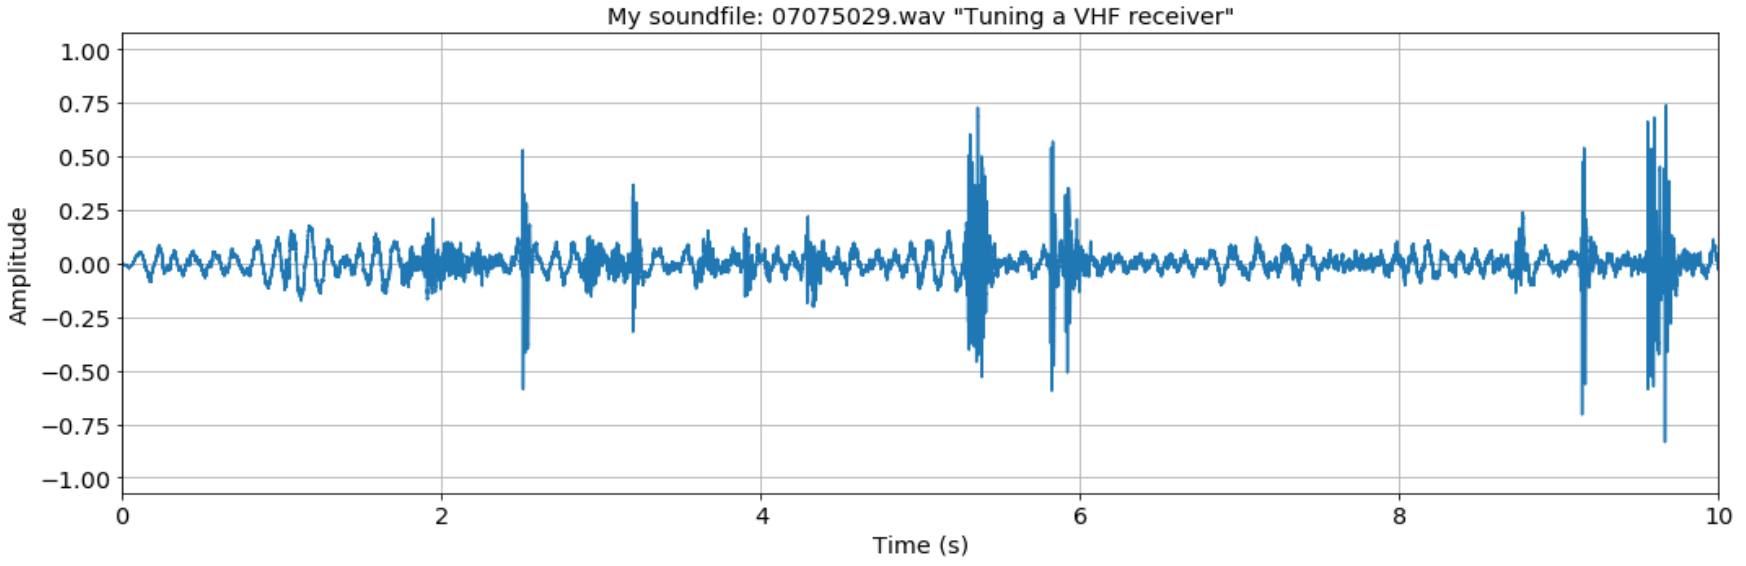

In [3]:
# Now we plot the entire audio file
import pydub
import matplotlib.pyplot as plt
import numpy as np

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

/home/vscode/.local/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Text(0, 0.5, 'Amplitude')

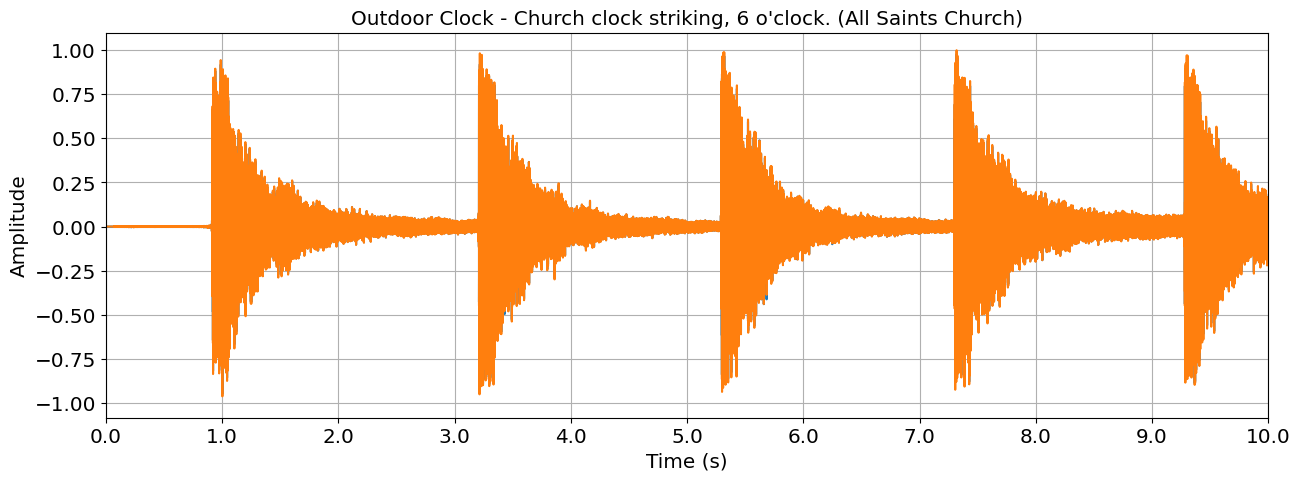

In [4]:
# add your code below
# path to audio sample
PATH = "bell.wav"
MONO = 1
TEN_SECONDS = 10
SAMPLE_RATE = 44100
MS = 1000

""" 
A method to convert audio segment to an nparray 
The procedure was found at https://github.com/jiaaro/pydub/blob/master/API.markdown#audiosegmentget_array_of_samples
"""
def convert_audio_segment_to_nparray(audio_segment):
    channel_sounds = audio_segment.split_to_mono()
    samples = [s.get_array_of_samples() for s in channel_sounds]
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(samples[0].typecode).max
    return fp_arr

# load a new Audio Segment (in this case, we chose bell.wav)
AUDIO = pydub.AudioSegment.from_file(PATH, format="wav")

# Following four lines are found at https://github.com/jiaaro/pydub/blob/master/API.markdown#audiosegmentget_array_of_samples
AUDIO_ARRAY = convert_audio_segment_to_nparray(AUDIO)

# Set up ticks and labels
XTICKS_SECONDS = np.arange(0, len(AUDIO_ARRAY), SAMPLE_RATE) # make a tick each second
XTICKS_SECONDS_LABELS = np.arange(0, len(AUDIO), MS)

# Plot the result
plt.plot(AUDIO_ARRAY)
plt.xticks(XTICKS_SECONDS, labels=XTICKS_SECONDS_LABELS/MS)
plt.xlim(0, TEN_SECONDS*SAMPLE_RATE)
plt.grid()

# Prettify plot
plt.title("Outdoor Clock - Church clock striking, 6 o'clock. (All Saints Church)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

(0.0, 769104.0)

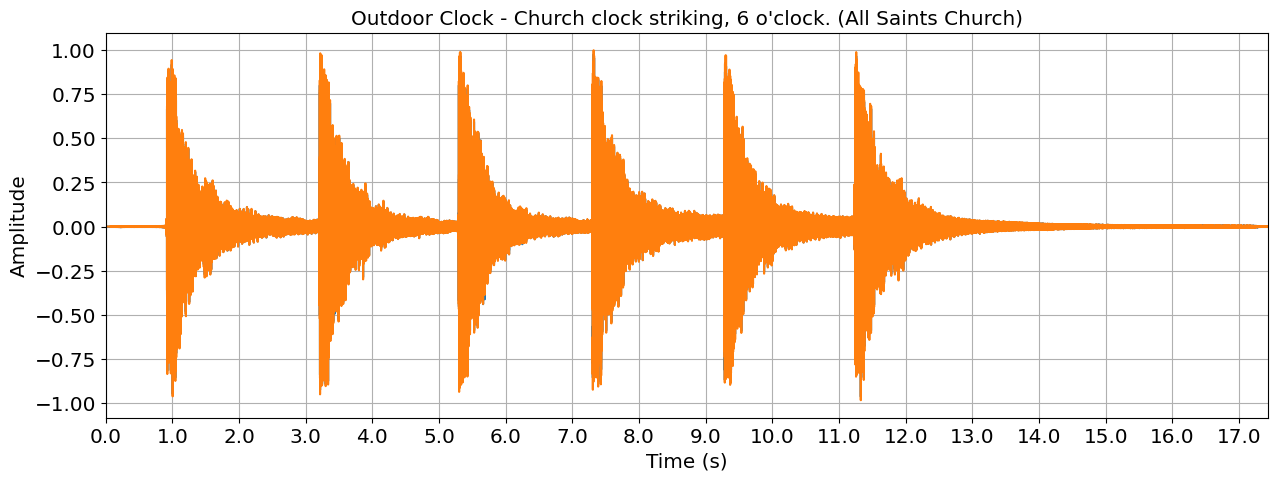

In [15]:
# Plot the result
plt.plot(AUDIO_ARRAY)
plt.xticks(XTICKS_SECONDS, labels=XTICKS_SECONDS_LABELS/MS)
plt.grid()

# Prettify plot
plt.title("Outdoor Clock - Church clock striking, 6 o'clock. (All Saints Church)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, len(AUDIO_ARRAY))


2. With the audio file you have chosen, zoom into two different 100 ms portions that have audio data and plot them. 

>Below is what mine looks like. We can see the sound appears quite different at both times. At  about 2500 ms we see a sudden rise that decays and oscillates. At about 26 s we see a noisy waveform that has a small amplitude. 

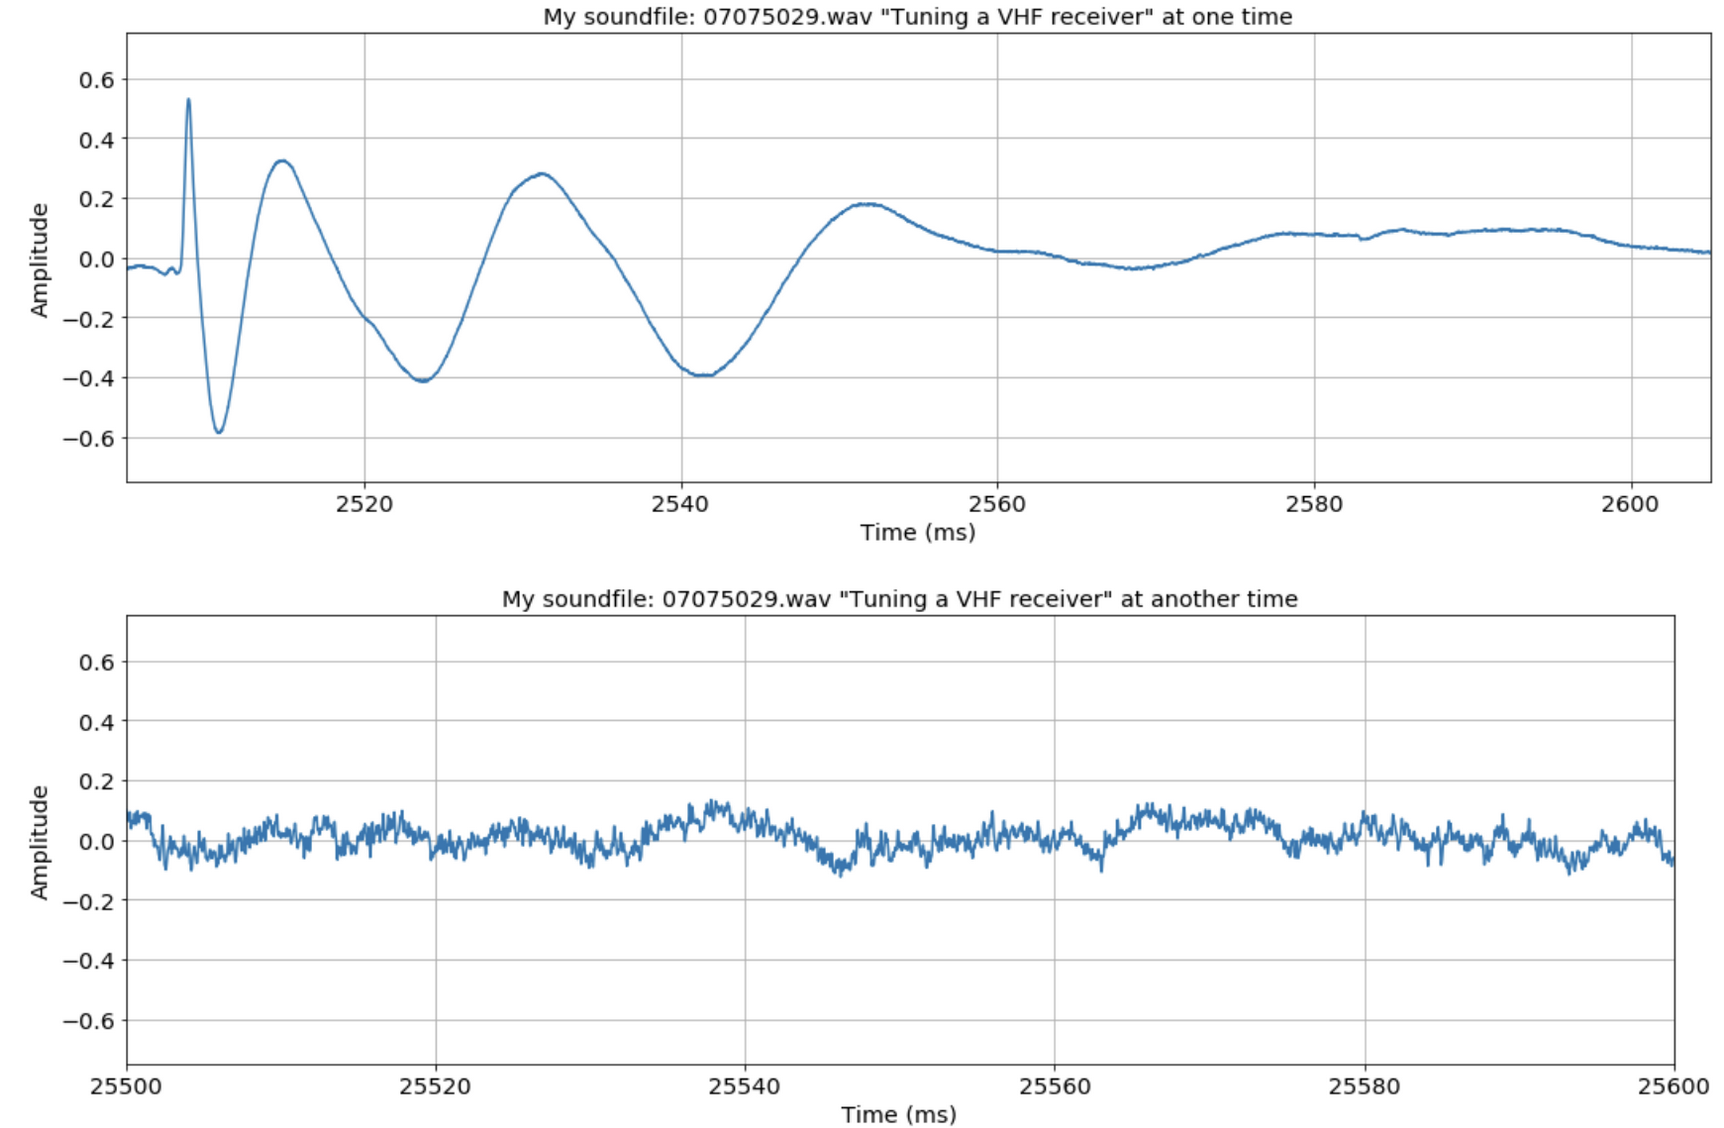

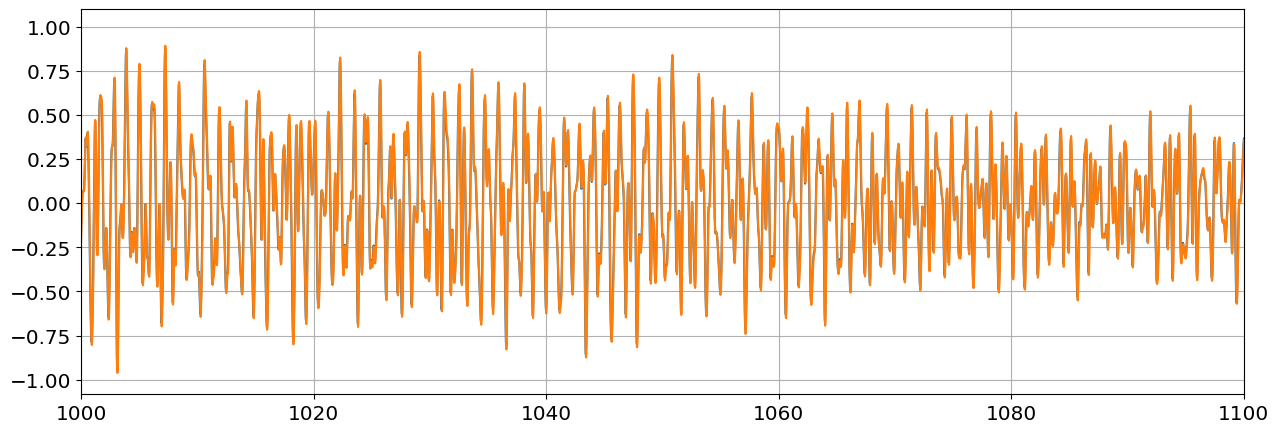

In [6]:

S1 = 44100 # one second
S2 = 90000 # 90000 samples is... almost 2 seconds
MS = 1000
STEP = 20
SAMPLE_SIZE = 4410

# 20 ms is 882 samples
XTICKS_MS = np.arange(0, len(AUDIO_ARRAY), SAMPLE_RATE/MS*STEP)
XTICKS_MS_LABELS = np.arange(0, len(AUDIO), 20)

plt.plot(AUDIO_ARRAY)
plt.xticks(XTICKS_MS, labels=XTICKS_MS_LABELS)
plt.xlim(S1, S1 + SAMPLE_SIZE)
plt.grid()


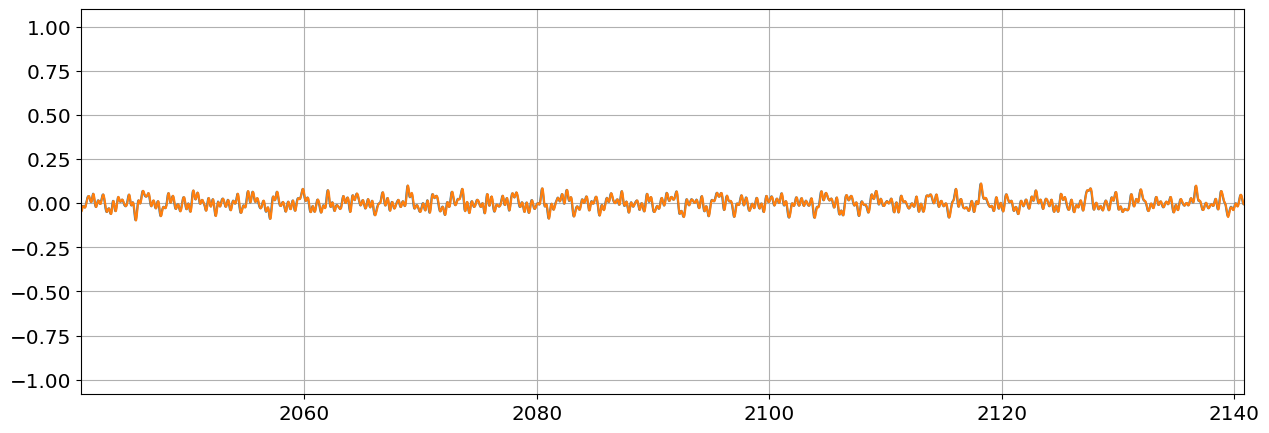

In [7]:
plt.plot(AUDIO_ARRAY)
plt.xticks(XTICKS_MS, labels=XTICKS_MS_LABELS)
plt.xlim(S2, S2 + SAMPLE_SIZE)
plt.grid()

Text(0, 0.5, 'Amplitude')

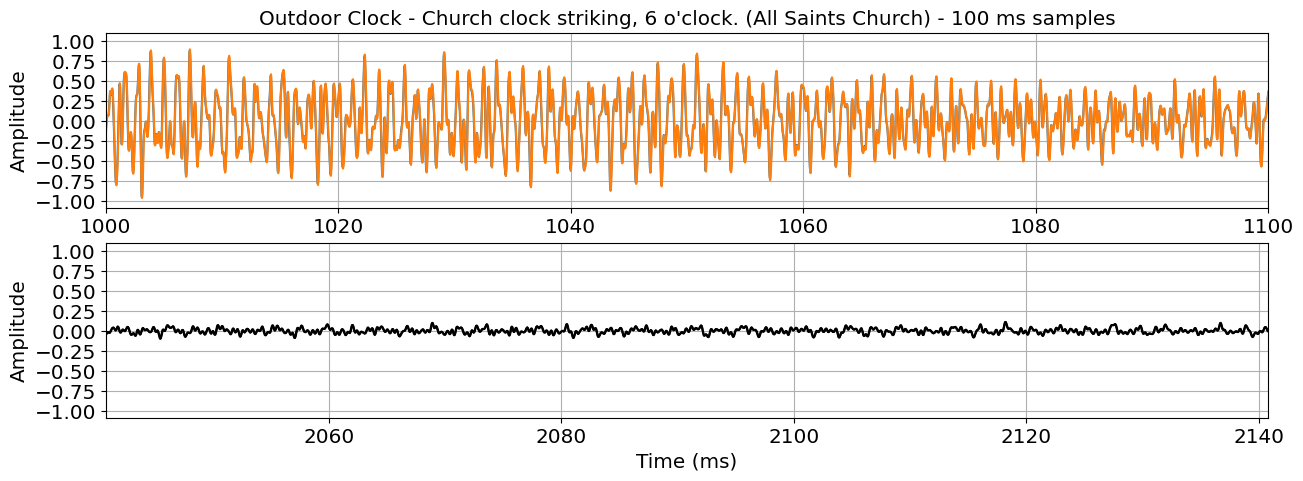

In [8]:
S1 = 44100 # one second
S2 = 90000 # 90000 samples is... almost 2 seconds
MS = 1000
STEP = 20
SAMPLE_SIZE = 4410

# 20 ms is 882 samples
XTICKS_MS = np.arange(0, len(AUDIO_ARRAY), SAMPLE_RATE/MS*STEP)
XTICKS_MS_LABELS = np.arange(0, len(AUDIO), 20)

y = np.arange(-1, 1.25, 0.25)

plt.figure()
plt.subplot(211)
plt.plot(AUDIO_ARRAY)
plt.xticks(XTICKS_MS, labels=XTICKS_MS_LABELS)
plt.yticks(y)
plt.xlim(S1, S1 + SAMPLE_SIZE)
plt.grid()
plt.title("Outdoor Clock - Church clock striking, 6 o'clock. (All Saints Church) - 100 ms samples")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

plt.subplot(212)
plt.plot(AUDIO_ARRAY, color='black')
plt.xticks(XTICKS_MS, labels=XTICKS_MS_LABELS)
plt.yticks(y)
plt.xlim(S2, S2 + SAMPLE_SIZE)
plt.grid()
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")


3. For each of the segments you looked at above, window them, and compute their
Fourier transforms. Plot their dB magnitude spectra. Appropriately label your axes
with "Magnitude (dB)" and "Frequency (kHz)". The frequency axis must be in
kiloHertz, and limited to 0 to the Nyquist frequency (half the sampling rate). Window
the audio with 1) boxcar, or 2) Hann. (This means you will have create four plots in
total, or two plots with two lines each.)

/home/vscode/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(array([6.57668223e-05, 4.27369904e-05, 3.58175136e-05, ...,
        1.96973097e-06, 2.11913782e-06, 2.52195398e-06]),
 array([0.00000000e+00, 4.53514739e-04, 9.07029478e-04, ...,
        9.99092971e-01, 9.99546485e-01, 1.00000000e+00]),
 <matplotlib.lines.Line2D at 0xffff524888b0>)

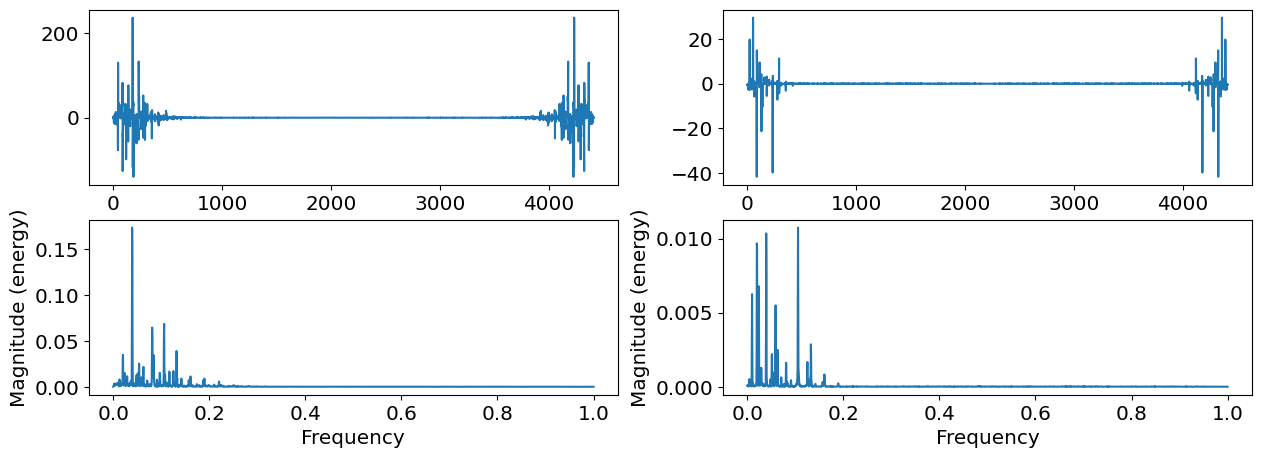

In [ ]:
# add your code below
# (HANNING) WINDOW FUNCTION IN NUMPY: https://numpy.org/doc/stable/reference/generated/numpy.hanning.html#numpy.hanning
# TODO importera scipy fft
# TODO "window them"?
SAMPLE_ONE = AUDIO_ARRAY[S1:S1+SAMPLE_SIZE]
SAMPLE_TWO = AUDIO_ARRAY[S2:S2+SAMPLE_SIZE]

fig, axs = plt.subplots(2, 2)
axs[0,0].plot(np.fft.fft(SAMPLE_ONE[:,-1])) #TODO only plotting mono here
axs[1,0].magnitude_spectrum(SAMPLE_ONE[:,-1])
axs[0,1].plot(np.fft.fft(SAMPLE_TWO[:,-1]))
axs[1,1].magnitude_spectrum(SAMPLE_TWO[:,-1])


/home/vscode/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


array([[ 0.36632521+0.j        , -0.22676534+0.j        ,
         0.58766607+0.j        ],
       [ 0.75040638-0.09403193j,  1.85326078+0.14738935j,
         0.08639012+0.26134168j],
       [-1.44877508+2.42288608j, -3.66976733-1.472129j  ,
        -1.71142911-1.94678484j],
       ...,
       [ 0.11778656+5.38111976j,  2.38650877-3.31312144j,
         4.30361867-2.04516724j],
       [-1.44877508-2.42288608j, -3.66976733+1.472129j  ,
        -1.71142911+1.94678484j],
       [ 0.75040638+0.09403193j,  1.85326078-0.14738935j,
         0.08639012-0.26134168j]])

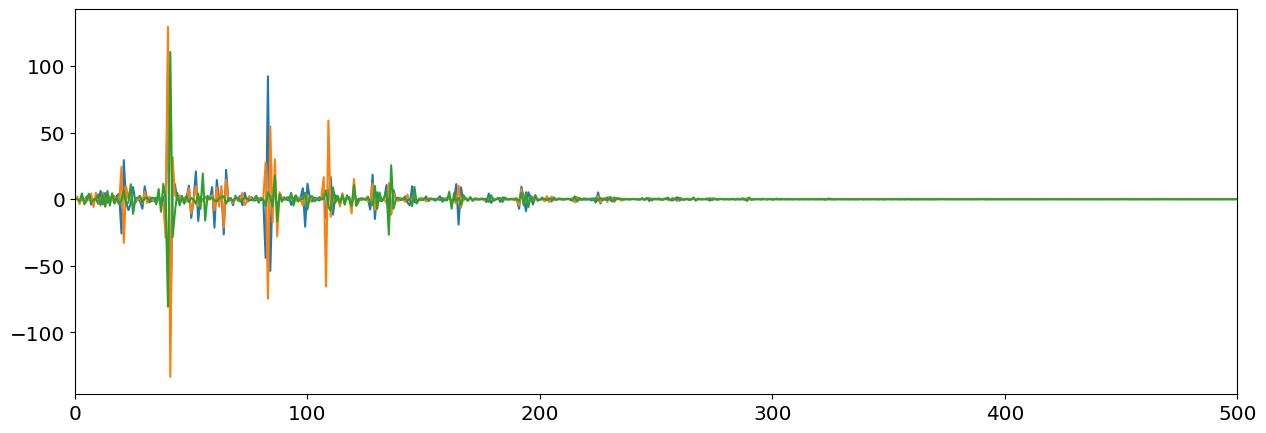

In [19]:
# This example is borrowed from https://www.audiolabs-erlangen.de/resources/MIR/FMP/C2/C2_STFT-Basic.html 
def stft_basic(x, w, H=8):
    """Compute a basic version of the discrete short-time Fourier transform (STFT)

    Args:
        x (np.ndarray): Signal to be transformed
        w (np.ndarray): Window function
        H (int): Hopsize (Default value = 8)

    Returns:
        X (np.ndarray): The discrete short-time Fourier transform
    """
    N = len(w)
    L = len(x)
    M = np.floor((L - N) / H).astype(int) + 1
    X = np.zeros((N, M), dtype='complex')
    for m in range(M):
        x_win = x[m*H : m*H+N] * w
        X_win = np.fft.fft(x_win)
        X[:, m] = X_win
    return X

H = 1024
N = 2048
w = np.hanning(N)

SAMPLE_ONE = AUDIO_ARRAY[S1:S1+SAMPLE_SIZE]
SAMPLE_TWO = AUDIO_ARRAY[S2:S2+SAMPLE_SIZE]


H = 1024
N = 2048
w = np.hanning(N)

X = stft_basic(SAMPLE_ONE[:,-1], w, H)
Y = np.abs(X) ** 2 # per definition


#plt.imshow(Y, origin='lower', aspect='auto', cmap='gray_r')
# TODO why is it in all the colors of the rainbow?
plt.plot(X)
plt.xlim(0, 500)
X


4. For the first 10 seconds of your audio file, compute and plot its dB magnitude short-time Fourier transform using a Hann window of duration 25 ms with a window hopsize of 10 ms, and an FFT size of 8192 samples. Do the same using a Hann window of duration 100 ms with a window hopsize of 10 ms. Appropriately label your axes with "Frequency (kHz)" and "Time (s)". The frequency axis must be in kiloHertz, and limited to 0 to 5 kHz. The time axis must be in seconds. Choose a colormap that you feel describes your personality (https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html). See [scipy.signal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html) for help.

In [ ]:
# add your code below


5. Describe some of the advantages and nackdelar of using short or long time windows for time-frequency analysis.


Course litterature page 101

Picking window size is a trade-off; large windows lead to accurate frequency at the expense of time, and vice versa.

### Short windows
* A short window enables the STFT to represent time with better accuracy.
* Risk of *frequency smearing*; if the size of the window is too small, it might be hard to distingiush tightly coupled frequency components.

### Long windows
* A wider window enables the STFT to represent frequency with better accuracy.
* Risk of *time smearing* -- as the course litterature puts it, "increased smearing in the time domain".

6. For the first 10 seconds of your audio file, use the [librosa package](https://github.com/librosa) to compute its Mel spectrogram using Hann windows of duration 25 ms with a window hopsize of 10 ms. Use 128 Mel bands and an FFT size of 8192 samples. Display the dB magnitude with reference to the max power observed, and limit your y-axis between 0 and 5 kHz. Use the same colormap as you used above. See https://github.com/librosa/librosa/blob/main/examples/LibROSA%20demo.ipynb for help. 

In [ ]:
import librosa
import librosa.display

# add your code below


OSError: sndfile library not found

# Part 2: Extracting features

1. Write a function that will take in the samples of an audio file, a frame size in samples, a frame hop size in samples, and compute and return the number of waveform zero crossings in each frame. A waveform x[n] undergoes a zero crossing when sign(x[n]) and sign(x[n+1]) are different. You will have to slice x[n] into chunks of a specified size, and for each of those chunks, count the number of sign changes.

In [ ]:
# add your code below


2. Using your function, compute zero crossings of 46 ms frames hopped 50% of that for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of zero crossings you extracted.

In [ ]:
# add your code below


3. Write a function that will take in the samples of an audio file, a frame size in samples, a hop size in samples, and a sampling rate, and compute and return the spectral centroid of each frame. The spectral centroid of a rectangular window of audio $x[n]$ of length $N$ (even) is defined as 
$$ R_{0.5}(x) = \frac{\sum_{k=0}^{N/2+1} \frac{F_s k}{N} |X[k]|}{\sum_{k=0}^{N/2+1} |X[k]|} $$
where $X[k]$ is the DFT of $x[n]$, and $F_s$ is the sampling rate.

In [ ]:
# add your code below



4. Using your function, compute spectral centroid features for contiguous 46 ms frames hopped 50% for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of spectral centroids you extracted.

In [ ]:
# add your code below


5. Using the librosa package (https://github.com/librosa), extract the first 10 MFCC features from your audio file using Hann windows of 25 ms duration and 10 ms hop size, and an FFT size of 8192 samples. Display the extracted MFCCs for the first 10 seconds.

In [ ]:
# add your code below
